In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error,mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import GRU, Dense
from tabulate import tabulate
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [95]:
url = 'https://raw.githubusercontent.com/CallMePo/Final-Project-PMA/master/KepRiau%202015%20-%202022.csv'
df = pd.read_csv(url)
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


In [96]:
df['datetime'] = pd.to_datetime(df['datetime'])
train_datetime = pd.to_datetime(df['datetime'])
df

,datetime,total_visitor,total_accomodation
0,2014-01-01,164430,10055
1,2014-02-01,137055,10079
2,2014-03-01,167030,10132
3,2014-04-01,151982,10190
4,2014-05-01,154299,10274
...,...,...,...
103,2022-08-01,79470,15449
104,2022-09-01,104652,15502
105,2022-10-01,106160,15525
106,2022-11-01,103940,15612


In [97]:
selected_columns = ['total_visitor','total_accomodation']
data_train = df.loc[:, selected_columns].astype(float)

In [98]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_train)

TEST SIZE 80 : 20

In [99]:
n_future=1
n_step=12

X_train=[]
y_train=[]
for i in range (n_step, len(data_scaled)-n_future+1):
    past_data = data_scaled[i-n_step:i, 0:data_scaled.shape[1]]
    future_data=data_scaled[i+n_future - 1:i +n_future,0]
    
    X_train.append(past_data)
    y_train.append(future_data)

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 12, 2)
(76, 1)
(20, 12, 2)
(20, 1)


In [101]:
model=Sequential()
model.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))

In [102]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 64)                13056     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13121 (51.25 KB)
Trainable params: 13121 (51.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [104]:
history=model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


3/3 [==============================] - 2s 6ms/step - loss: 0.3466
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.2242
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1444
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0979
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0668
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0601
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0502
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0388
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0309
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0268
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0247
Epoch 13/100
3/3 [==============================] - 0s 7ms/step - loss: 0

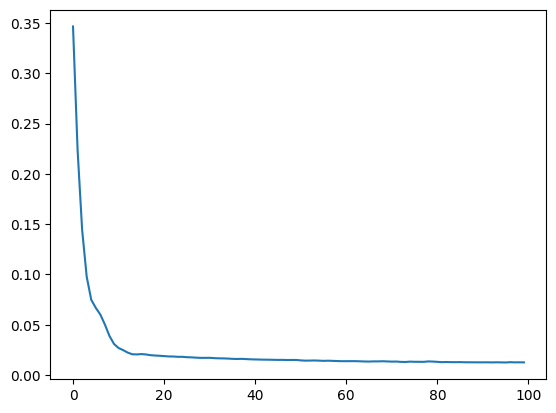

In [105]:
plt.plot(history.history['loss'])

In [106]:
n_past=1
n_pred=12
last_date=list(train_datetime)[-n_past]

predict_12=pd.date_range(last_date, periods=n_pred, freq='M').tolist()
print(predict_12)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00')]


In [107]:
from sklearn.metrics import mean_absolute_error

prediction=model.predict(X_test[-n_pred:])

mse=mean_squared_error(y_test[-n_pred:],prediction)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test[-n_pred:],prediction)
mae=mean_absolute_error(y_test[-n_pred:], prediction)

print("mse:",mse)
print("rmse",rmse)
print("MAPE:", f"{mape:.2f}%")
print("mae",mae)

1/1 [==============================] - 0s 481ms/step
mse: 0.006496278388047325
rmse 0.08059949372078788
MAPE: 6.10%
mae 0.06281785122371655


In [108]:
prediction_copy = np.repeat(prediction, data_train.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copy)[:, 0]

C:\Users\ilham\AppData\Local\Temp\ipykernel_2212\1499544800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime']=pd.to_datetime(actual['datetime'])


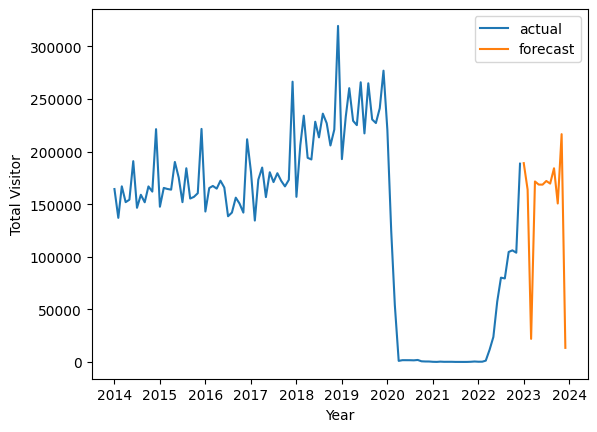

In [109]:
forecast_dates=[]
for i in predict_12:
    forecast_dates.append(i.date())
    
df_forecast=pd.DataFrame({'Date': forecast_dates,'total_visitor':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

actual=df[['datetime','total_visitor']]
actual['datetime']=pd.to_datetime(actual['datetime'])
actual=actual.loc[actual['datetime']>='2013-01-01']

sns.lineplot(actual, x='datetime', y='total_visitor',label='actual')
sns.lineplot(df_forecast,x='Date',y='total_visitor',label='forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


In [110]:
forecast_dates_1=pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

data=list(zip(forecast_dates_1,y_pred_future))

headers=['Date','Prediction']
table=tabulate(data, headers=headers, tablefmt='fancy_grid')
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │     189058   │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     163869   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      22055.1 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     171621   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     168687   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     168620   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     172083   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     169628   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     184192   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     150701   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     216592   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

TEST SIZE 70 : 30

In [111]:
n_future=1
n_step=12

X_train=[]
y_train=[]
for i in range (n_step, len(data_scaled)-n_future+1):
    past_data = data_scaled[i-n_step:i, 0:data_scaled.shape[1]]
    future_data=data_scaled[i+n_future - 1:i +n_future,0]
    
    X_train.append(past_data)
    y_train.append(future_data)

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [112]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67, 12, 2)
(67, 1)
(29, 12, 2)
(29, 1)


In [113]:
model=Sequential()
model.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 64)                13056     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13121 (51.25 KB)
Trainable params: 13121 (51.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
history=model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 [==============================] - 4s 7ms/step - loss: 0.2829
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1703
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1057
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0752
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0637
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0591
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0550
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0498
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0411
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0326
Epoch 11/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0258
Epoch 13/100
3/3 [==============================] - 0s 7ms/st

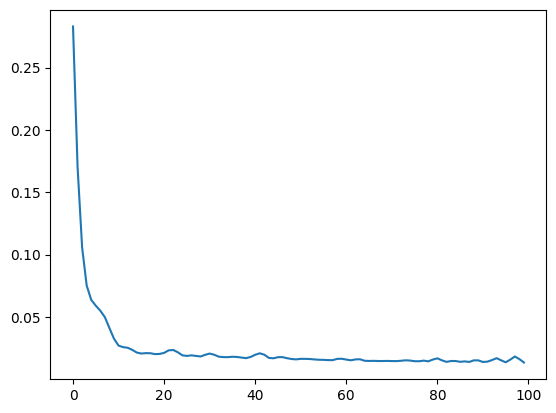

In [116]:
plt.plot(history.history['loss'])

In [117]:
n_past=1
n_pred=12
last_date=list(train_datetime)[-n_past]

predict_12=pd.date_range(last_date, periods=n_pred, freq='M').tolist()
print(predict_12)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00')]


In [118]:
from sklearn.metrics import mean_absolute_error

prediction=model.predict(X_test[-n_pred:])

mse=mean_squared_error(y_test[-n_pred:],prediction)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test[-n_pred:],prediction)
mae=mean_absolute_error(y_test[-n_pred:], prediction)

print("mse:",mse)
print("rmse",rmse)
print("MAPE:", f"{mape:.2f}%")
print("mae",mae)

1/1 [==============================] - 1s 539ms/step
mse: 0.005671620927482548
rmse 0.07531016483505097
MAPE: 8.01%
mae 0.06147289490200868


In [119]:
prediction_copy = np.repeat(prediction, data_train.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copy)[:, 0]

C:\Users\ilham\AppData\Local\Temp\ipykernel_2212\1499544800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime']=pd.to_datetime(actual['datetime'])


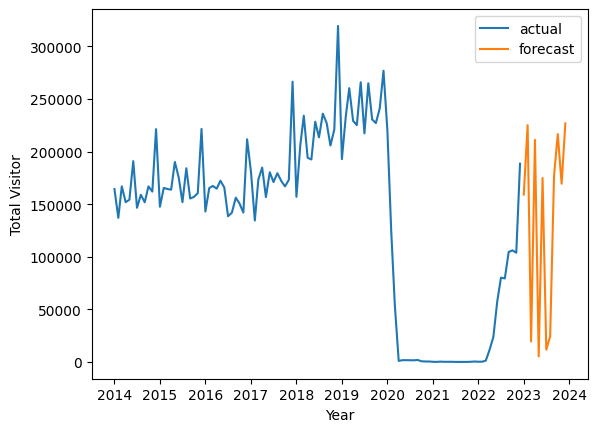

In [120]:
forecast_dates=[]
for i in predict_12:
    forecast_dates.append(i.date())
    
df_forecast=pd.DataFrame({'Date': forecast_dates,'total_visitor':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

actual=df[['datetime','total_visitor']]
actual['datetime']=pd.to_datetime(actual['datetime'])
actual=actual.loc[actual['datetime']>='2013-01-01']

sns.lineplot(actual, x='datetime', y='total_visitor',label='actual')
sns.lineplot(df_forecast,x='Date',y='total_visitor',label='forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


In [121]:
forecast_dates_1=pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

data=list(zip(forecast_dates_1,y_pred_future))

headers=['Date','Prediction']
table=tabulate(data, headers=headers, tablefmt='fancy_grid')
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │    159198    │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │    225153    │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     19570.8  │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │    211209    │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      5405.19 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │    174943    │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     11798.9  │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     24523    │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │    176744    │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │    216660    │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │    169497    │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

TEST SIZE 60 : 40

In [122]:
n_future=1
n_step=12

X_train=[]
y_train=[]
for i in range (n_step, len(data_scaled)-n_future+1):
    past_data = data_scaled[i-n_step:i, 0:data_scaled.shape[1]]
    future_data=data_scaled[i+n_future - 1:i +n_future,0]
    
    X_train.append(past_data)
    y_train.append(future_data)

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [123]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67, 12, 2)
(67, 1)
(29, 12, 2)
(29, 1)


In [124]:
model=Sequential()
model.add(GRU(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 64)                13056     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13121 (51.25 KB)
Trainable params: 13121 (51.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [126]:
history=model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 6ms/step - loss: 0.5400
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.3545
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.2223
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1256
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0665
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0445
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0435
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0491
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0506
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0434
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0344
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0273
Epoch 13/100
3/3 [==============================] - 0s 7ms/st

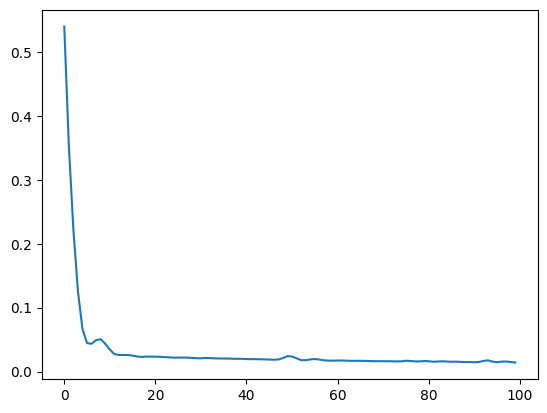

In [127]:
plt.plot(history.history['loss'])

In [128]:
n_past=1
n_pred=12
last_date=list(train_datetime)[-n_past]

predict_12=pd.date_range(last_date, periods=n_pred, freq='M').tolist()
print(predict_12)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00')]


In [129]:
from sklearn.metrics import mean_absolute_error

prediction=model.predict(X_test[-n_pred:])

mse=mean_squared_error(y_test[-n_pred:],prediction)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test[-n_pred:],prediction)
mae=mean_absolute_error(y_test[-n_pred:], prediction)

print("mse:",mse)
print("rmse",rmse)
print("MAPE:", f"{mape:.2f}%")
print("mae",mae)

1/1 [==============================] - 0s 459ms/step
mse: 0.005359560598819735
rmse 0.0732090199280098
MAPE: 6.55%
mae 0.057155314178366896


In [130]:
prediction_copy = np.repeat(prediction, data_train.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copy)[:, 0]

C:\Users\ilham\AppData\Local\Temp\ipykernel_2212\1499544800.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['datetime']=pd.to_datetime(actual['datetime'])


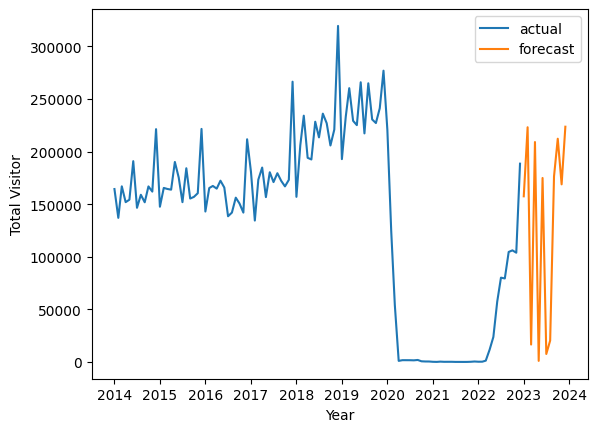

In [131]:
forecast_dates=[]
for i in predict_12:
    forecast_dates.append(i.date())
    
df_forecast=pd.DataFrame({'Date': forecast_dates,'total_visitor':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

actual=df[['datetime','total_visitor']]
actual['datetime']=pd.to_datetime(actual['datetime'])
actual=actual.loc[actual['datetime']>='2013-01-01']

sns.lineplot(actual, x='datetime', y='total_visitor',label='actual')
sns.lineplot(df_forecast,x='Date',y='total_visitor',label='forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


In [132]:
forecast_dates_1=pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

data=list(zip(forecast_dates_1,y_pred_future))

headers=['Date','Prediction']
table=tabulate(data, headers=headers, tablefmt='fancy_grid')
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │    157522    │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │    223154    │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     16660.9  │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │    209105    │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      1139.49 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │    174946    │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      7717.31 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │     20436.9  │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │    176491    │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │    212252    │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │    168894    │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  